2021-11-30 <br/>
World Cup Cricket <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-11-30/readme.md


Treemaps - Completed <br/>
Using HTML for Title - Completed

https://plotly.com/python/treemaps/ <br/>
https://towardsdatascience.com/a-clean-style-for-plotly-charts-250ba2f5f015

In [40]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
pio.renderers.default='notebook'
import os



In [41]:
df=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-11-30/matches.csv')

In [42]:
df.head()

,match_id,team1,team2,score_team1,score_team2,wickets_team2,wickets_team,team1_away_or_home,team2_home_away,winner,...,player_of_match,player_of_match_team,venue,toss,toss_decision,ball_remaining,ground,ground_city,ground_country,match_date
0,ODI # 1028,West Indies,Australia,172,173,9,9,away,home,Australia,...,Paul Reiffel,Australia,Sydney Cricket Ground,West Indies,bat first,NaN,Sydney,Moore Park,Australia,"Jan 1, 1996"
1,ODI # 1029,West Indies,Sri Lanka,194,124,10,10,away,away,West Indies,...,Shivnarine Chanderpaul,West Indies,"Bellerive Oval, Hobart",Sri Lanka,field first,NaN,Hobart,Bellerive,Australia,"Jan 3, 1996"
2,ODI # 1030,Sri Lanka,West Indies,102,104,10,3,away,away,West Indies,...,Curtly Ambrose,West Indies,"Brisbane Cricket Ground, Woolloongabba, Brisbane",Sri Lanka,bat first,with 143 balls remaining),Brisbane,Woolloongabba,Australia,"Jan 5, 1996"
3,ODI # 1031,West Indies,Australia,231,217,10,10,away,home,West Indies,...,Ottis Gibson,West Indies,"Brisbane Cricket Ground, Woolloongabba, Brisbane",Australia,field first,NaN,Brisbane,Woolloongabba,Australia,"Jan 7, 1996"
4,ODI # 1032,Australia,Sri Lanka,213,214,5,7,home,away,Sri Lanka,...,Romesh Kaluwitharana,Sri Lanka,Melbourne Cricket Ground,Australia,bat first,with 15 balls remaining),Melbourne,Jolimont,Australia,"Jan 9, 1996"


In [43]:
df.groupby('winner')['winner'].count()

winner
Africa XI                                             1
Asia XI                                               1
Australia                                           180
Bangladesh                                           10
Canada                                                1
England                                              88
ICC World XI                                          1
India                                               160
Kenya                                                12
Match tied                                           11
Match tied (D/L method)                               1
Netherlands                                           1
New Zealand                                         101
No result                                             2
Pakistan                                            174
Pakistan awarded the match (opposition conceded)      1
South Africa                                        177
Sri Lanka                                

In [139]:
# Finding the top 5 winners
winners=df['winner'].value_counts().head(5).reset_index()['index']

In [45]:
win_df=df[df.winner.isin(winners)]

In [46]:
win_df

,match_id,team1,team2,score_team1,score_team2,wickets_team2,wickets_team,team1_away_or_home,team2_home_away,winner,...,player_of_match,player_of_match_team,venue,toss,toss_decision,ball_remaining,ground,ground_city,ground_country,match_date
0,ODI # 1028,West Indies,Australia,172,173,9,9,away,home,Australia,...,Paul Reiffel,Australia,Sydney Cricket Ground,West Indies,bat first,NaN,Sydney,Moore Park,Australia,"Jan 1, 1996"
4,ODI # 1032,Australia,Sri Lanka,213,214,5,7,home,away,Sri Lanka,...,Romesh Kaluwitharana,Sri Lanka,Melbourne Cricket Ground,Australia,bat first,with 15 balls remaining),Melbourne,Jolimont,Australia,"Jan 9, 1996"
5,ODI # 1033,South Africa,England,211,205,8,10,home,away,South Africa,...,Shaun Pollock,South Africa,"Newlands, Cape Town",South Africa,bat first,NaN,Cape Town,Cape Town,South Africa,"Jan 9, 1996"
7,ODI # 1035,Australia,Sri Lanka,266,183,6,9,home,away,Australia,...,Mark Waugh,Australia,"Western Australia Cricket Association Ground, ...",Australia,bat first,NaN,Perth,East Perth,Australia,"Jan 12, 1996"
8,ODI # 1036,England,South Africa,198,199,8,7,away,home,South Africa,...,Shaun Pollock,South Africa,"New Wanderers Stadium, Johannesburg",England,bat first,with 11 balls remaining),Johannesburg,Johannesburg,South Africa,"Jan 13, 1996"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,ODI # 2301,Australia,New Zealand,252,105,8,10,away,home,Australia,...,Brett Lee,Australia,"Eden Park, Auckland",New Zealand,field first,NaN,Auckland,Auckland,New Zealand,"Dec 3, 2005"
1229,ODI # 2302,Australia,New Zealand,322,320,5,10,away,home,Australia,...,Andrew Symonds,Australia,"Westpac Stadium, Wellington",Australia,bat first,NaN,Wellington,Wellington,New Zealand,"Dec 7, 2005"
1232,ODI # 2305,England,Pakistan,230,231,10,3,away,home,Pakistan,...,Shoaib Akhtar,Pakistan,"Gaddafi Stadium, Lahore",England,bat first,with 36 balls remaining),Lahore,Lahore,Pakistan,"Dec 12, 2005"
1233,ODI # 2306,Pakistan,England,353,188,6,10,home,away,Pakistan,...,Kamran Akmal,Pakistan,"National Stadium, Karachi",England,field first,NaN,Karachi,Karachi,Pakistan,"Dec 15, 2005"


In [47]:
df.columns

Index(['match_id', 'team1', 'team2', 'score_team1', 'score_team2',
       'wickets_team2', 'wickets_team', 'team1_away_or_home',
       'team2_home_away', 'winner', 'margin', 'margin_type', 'time_of_day',
       'series', 'player_of_match', 'player_of_match_team', 'venue', 'toss',
       'toss_decision', 'ball_remaining', 'ground', 'ground_city',
       'ground_country', 'match_date'],
      dtype='object')

In [89]:
# Find the Home/Away advantage of the winning team
def is_home_away(team2_home_away,team2,winner,team1_away_or_home):
    
    x= team2_home_away if  team2 ==winner  else team1_away_or_home
    return x

In [90]:
win_df['winner_home_away']=win_df.apply(lambda x: is_home_away(x.team2_home_away,x.team2,x.winner,x.team1_away_or_home),axis=1)

d:\Users\DComputer\Desktop\learning\Streamlined EDA and ML\project_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
# Find the Toss advantage of the winning team
def is_toss_decision(winner,toss,toss_decision):
    winner,toss,toss_decision
    des=pd.Series(['bat first','field first'])
    decision=""
    if winner==toss:
        decision= des[des.isin([toss_decision])].values[0]
    else:
        decision = des[~des.isin([toss_decision])].values[0]
    return decision

In [92]:
win_df['winner_toss_decision']=win_df.apply(lambda x: is_toss_decision(x.winner,x.toss,x.toss_decision),axis=1)

d:\Users\DComputer\Desktop\learning\Streamlined EDA and ML\project_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
win_df.head()

,match_id,team1,team2,score_team1,score_team2,wickets_team2,wickets_team,team1_away_or_home,team2_home_away,winner,...,venue,toss,toss_decision,ball_remaining,ground,ground_city,ground_country,match_date,winner_home_away,winner_toss_decision
0,ODI # 1028,West Indies,Australia,172,173,9,9,away,home,Australia,...,Sydney Cricket Ground,West Indies,bat first,NaN,Sydney,Moore Park,Australia,"Jan 1, 1996",home,field first
4,ODI # 1032,Australia,Sri Lanka,213,214,5,7,home,away,Sri Lanka,...,Melbourne Cricket Ground,Australia,bat first,with 15 balls remaining),Melbourne,Jolimont,Australia,"Jan 9, 1996",away,field first
5,ODI # 1033,South Africa,England,211,205,8,10,home,away,South Africa,...,"Newlands, Cape Town",South Africa,bat first,NaN,Cape Town,Cape Town,South Africa,"Jan 9, 1996",home,bat first
7,ODI # 1035,Australia,Sri Lanka,266,183,6,9,home,away,Australia,...,"Western Australia Cricket Association Ground, ...",Australia,bat first,NaN,Perth,East Perth,Australia,"Jan 12, 1996",home,bat first
8,ODI # 1036,England,South Africa,198,199,8,7,away,home,South Africa,...,"New Wanderers Stadium, Johannesburg",England,bat first,with 11 balls remaining),Johannesburg,Johannesburg,South Africa,"Jan 13, 1996",home,field first


In [94]:
df_winner=win_df[['winner','winner_home_away','winner_toss_decision']]

In [95]:
df_winner.head()

,winner,winner_home_away,winner_toss_decision
0,Australia,home,field first
4,Sri Lanka,away,field first
5,South Africa,home,bat first
7,Australia,home,bat first
8,South Africa,home,field first


In [ ]:
# Intersting way of formatting the title
def format_title_old(title, subtitle=None, subtitle_font_size=14):
    title = f'<b>{title}</b>'
    if not subtitle:
        return title
    subtitle = f'<span style="font-size: {subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'

In [130]:

def format_title(title=None, subtitle=None, subtitle_font_size=14):
    text1="Does having a Home/Away advantage and a Bat/Field first advatage" 
    text2= "Affect the top 5 winning teams?"
    title = f'<b>{text1}</b> <br><b>{text2}</b>'
    if not subtitle:
        return title
    subtitle = f'<span style="font-size: {subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'

In [137]:
# Building a Tree map that breaks down by hierarchy 
fig = px.treemap(df_winner, path=[px.Constant("Top 5 Winning Teams"), 'winner', 'winner_home_away', 'winner_toss_decision'],title =format_title())
fig.update_traces(root_color="lightgrey")
fig.update_layout(autosize=False,
    width=1500,
    height=500)
fig.show()

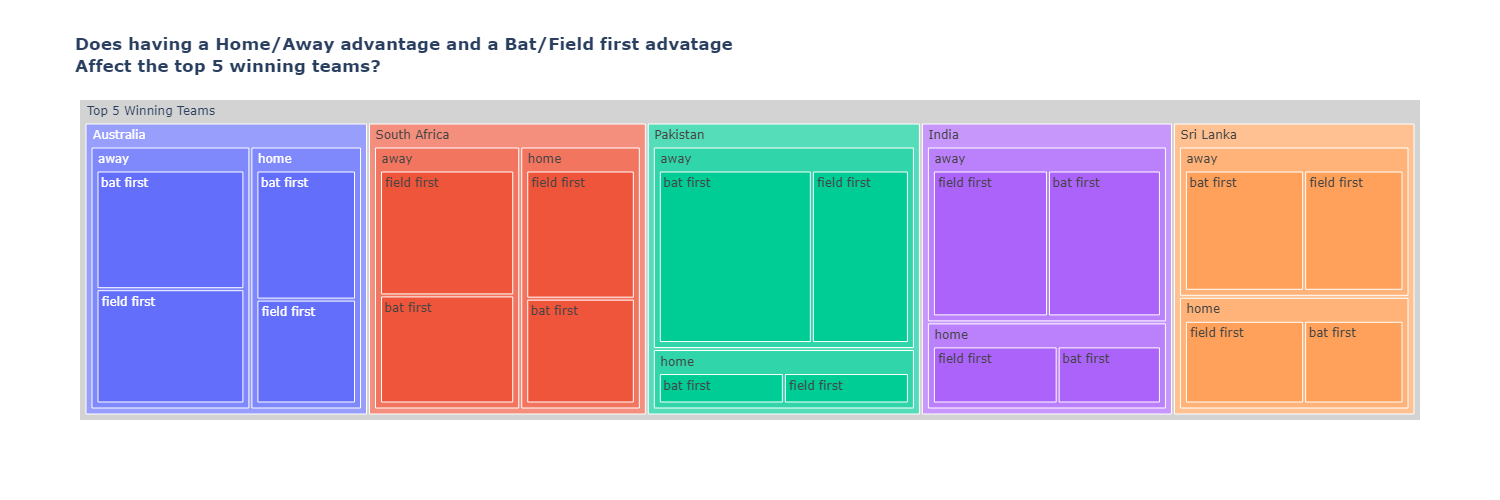

In [138]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)